In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [6]:
df["embarked_c"]=pd.factorize(df.Embarked)[0]

In [7]:
print(df["Embarked"].value_counts())
print(df["embarked_c"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
 0    644
 1    168
 2     77
-1      2
Name: embarked_c, dtype: int64


In [8]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [9]:
df.drop("Age",axis=1,inplace=True)

In [10]:
df["SEX"]=pd.factorize(df.Sex)[0]
print(df["Sex"].value_counts())
print(df["SEX"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
0    577
1    314
Name: SEX, dtype: int64


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
embarked_c     0
SEX            0
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
embarked_c     0
SEX            0
dtype: int64

In [14]:
df.shape

(889, 10)

In [15]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,embarked_c,SEX
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681,0.362205,0.350956
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504,0.636157,0.477538
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,2.000000,1.000000


PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
SibSp          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Parch                AxesSubplot(0.125,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.327174,0.125;0.168478x0.343182)
embarked_c        AxesSubplot(0.529348,0.125;0.168478x0.343182)
SEX               AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

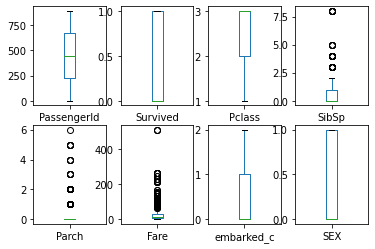

In [16]:
df.plot(kind="box",subplots=True,layout=(2,4))

In [17]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_c,SEX
0,1,0,3,male,1,0,7.2500,S,0,0
1,2,1,1,female,1,0,71.2833,C,1,1
2,3,1,3,female,0,0,7.9250,S,0,1
3,4,1,1,female,1,0,53.1000,S,0,1
4,5,0,3,male,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,0,0
887,888,1,1,female,0,0,30.0000,S,0,1
888,889,0,3,female,1,2,23.4500,S,0,1
889,890,1,1,male,0,0,30.0000,C,1,0


In [18]:
df.drop(["Sex","Embarked"],axis=1,inplace=True)

In [19]:
df.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
SibSp          3.691058
Parch          2.745160
Fare           4.801440
embarked_c     1.539926
SEX            0.625625
dtype: float64

In [23]:
z=np.abs(zscore(df))
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87, 117, 118, 158,
        163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277, 298, 310,
        323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 526, 540, 541,
        556, 566, 609, 637, 677, 678, 682, 685, 688, 699, 715, 729, 735,
        736, 741, 773, 778, 786, 791, 812, 823, 844, 848, 856, 861, 883],
       dtype=int64),
 array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3, 5, 3,
        3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 5, 3, 3, 5, 4, 4, 4, 4,
        5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 4, 5, 3, 3, 3, 3, 3, 3, 4, 3, 4],
       dtype=int64))

In [24]:
data=df[(z<3).all(axis=1)]

In [25]:
data.shape

(825, 8)

In [26]:
data.skew()

PassengerId   -0.001052
Survived       0.466296
Pclass        -0.628107
SibSp          1.981919
Parch          2.123284
Fare           2.335828
embarked_c     1.541287
SEX            0.685336
dtype: float64

In [27]:
data["Fare"]=np.log1p(data["Fare"])

<ipython-input-27-e4c54fa95da2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fare"]=np.log1p(data["Fare"])


In [28]:
data.skew()

PassengerId   -0.001052
Survived       0.466296
Pclass        -0.628107
SibSp          1.981919
Parch          2.123284
Fare           0.195573
embarked_c     1.541287
SEX            0.685336
dtype: float64

In [29]:
data

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,embarked_c,SEX
0,1,0,3,1,0,2.110213,0,0
1,2,1,1,1,0,4.280593,1,1
2,3,1,3,0,0,2.188856,0,1
3,4,1,1,1,0,3.990834,0,1
4,5,0,3,0,0,2.202765,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,2.639057,0,0
887,888,1,1,0,0,3.433987,0,1
888,889,0,3,1,2,3.196630,0,1
889,890,1,1,0,0,3.433987,1,0


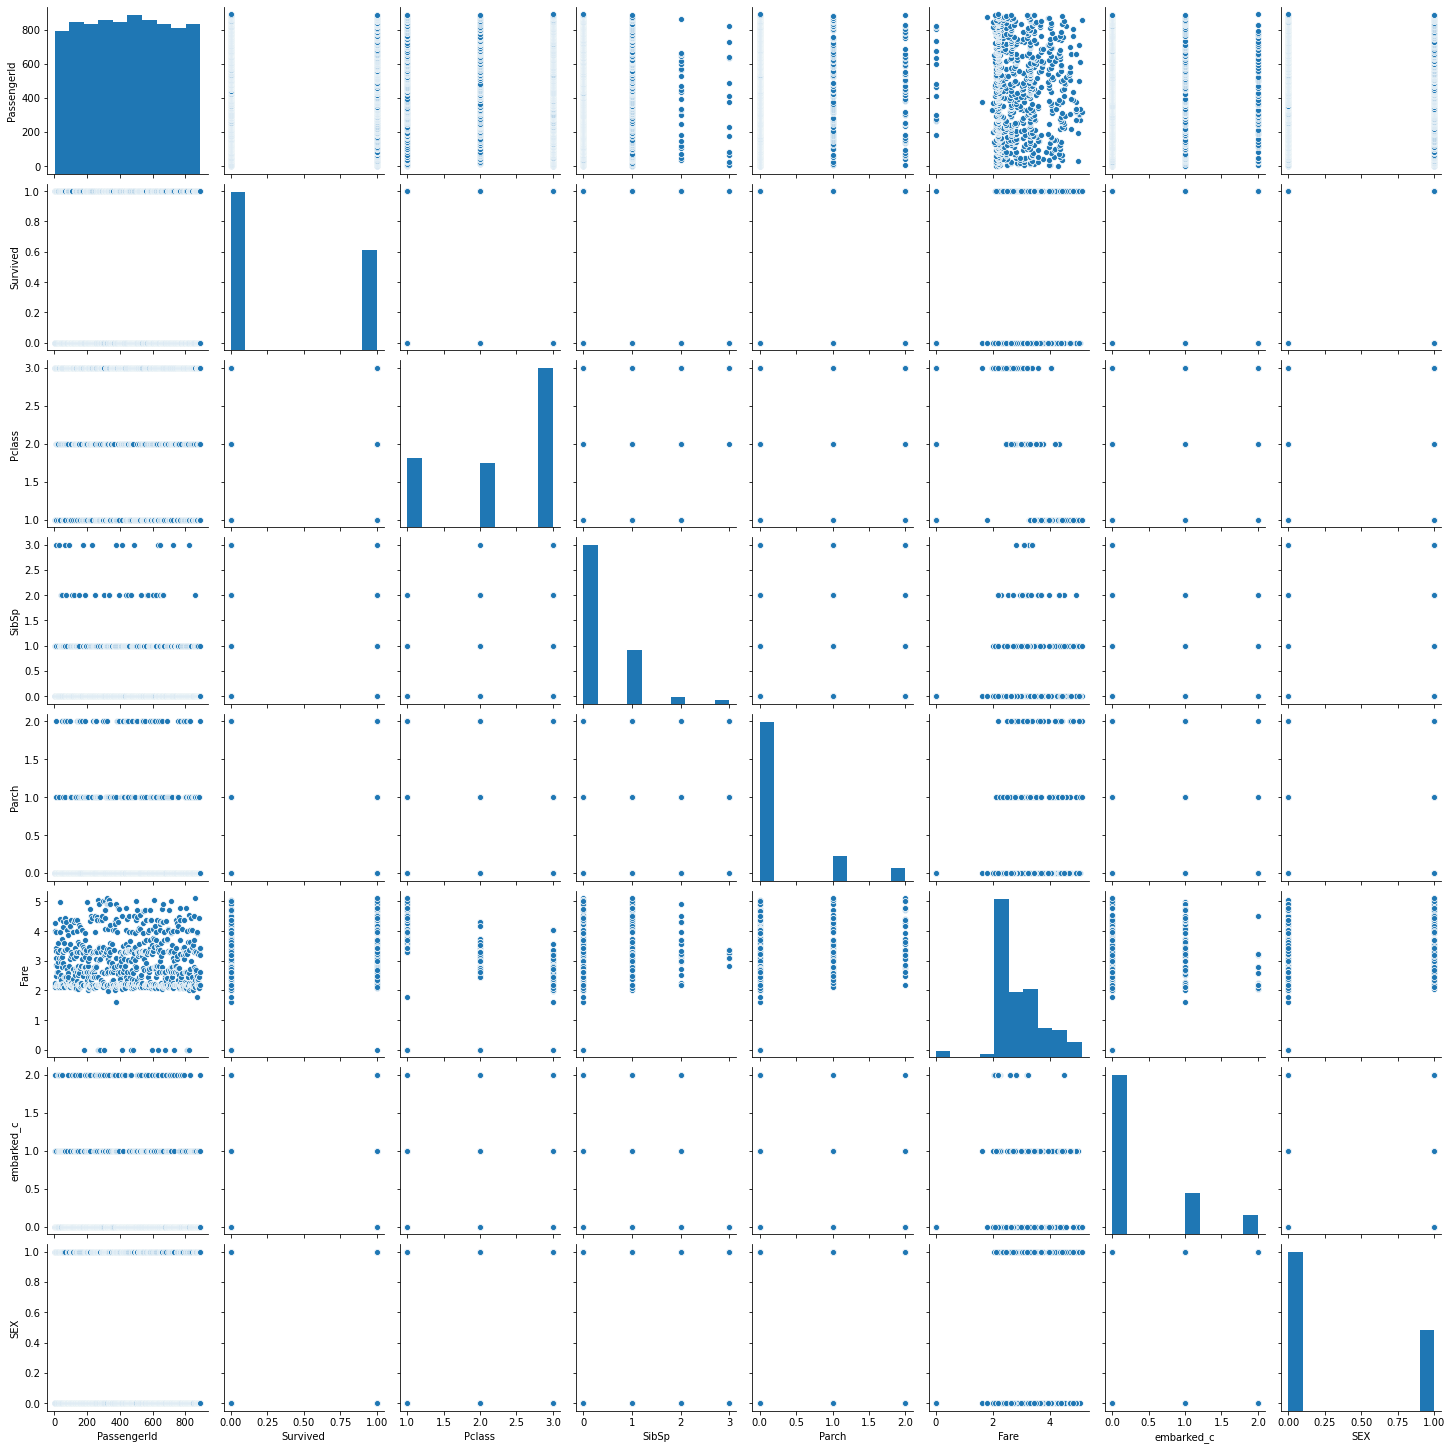

In [31]:
sns.pairplot(data)

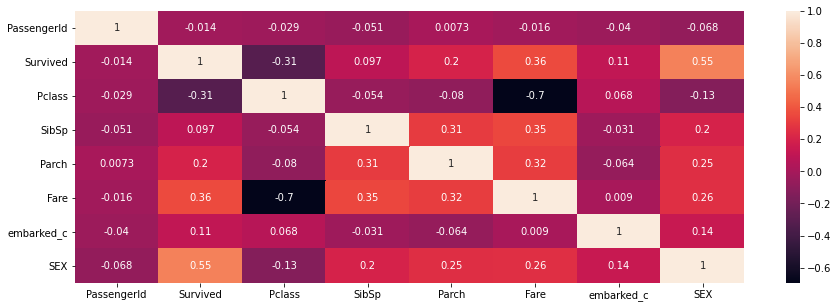

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

In [37]:
y=data.iloc[:,-2]
y

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: embarked_c, Length: 825, dtype: int64

In [42]:
X=data.drop("embarked_c",axis=1)
x=X.iloc[:,1:7]
x

,Survived,Pclass,SibSp,Parch,Fare,SEX
0,0,3,1,0,2.110213,0
1,1,1,1,0,4.280593,1
2,1,3,0,0,2.188856,1
3,1,1,1,0,3.990834,1
4,0,3,0,0,2.202765,0
...,...,...,...,...,...,...
886,0,2,0,0,2.639057,0
887,1,1,0,0,3.433987,1
888,0,3,1,2,3.196630,1
889,1,1,0,0,3.433987,0


In [144]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.79399923,  0.83548439,  1.05509263, -0.45122179, -0.84023425,
        -0.71483495],
       [ 1.25944706, -1.58302305,  1.05509263, -0.45122179,  1.59005148,
         1.39892432],
       [ 1.25944706,  0.83548439, -0.56284681, -0.45122179, -0.7521735 ,
         1.39892432],
       ...,
       [-0.79399923,  0.83548439,  1.05509263,  3.09409231,  0.37628261,
         1.39892432],
       [ 1.25944706, -1.58302305, -0.56284681, -0.45122179,  0.64206341,
        -0.71483495],
       [-0.79399923,  0.83548439, -0.56284681, -0.45122179, -0.77434752,
        -0.71483495]])

In [145]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),SVC(kernel="linear"),SVC(kernel="poly")]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=79)


    

In [143]:
for i in model:
    print("-----------------------",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("\n")

----------------------- DecisionTreeClassifier()
0.8608058608058609
0.9818840579710145
[[189   5   8]
 [ 16  30   1]
 [  8   0  16]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       202
           1       0.86      0.64      0.73        47
           2       0.64      0.67      0.65        24

    accuracy                           0.86       273
   macro avg       0.79      0.75      0.77       273
weighted avg       0.86      0.86      0.86       273



----------------------- KNeighborsClassifier()
0.7582417582417582
0.8079710144927537
[[182  11   9]
 [ 30  15   2]
 [ 12   2  10]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       202
           1       0.54      0.32      0.40        47
           2       0.48      0.42      0.44        24

    accuracy                           0.76       273
   macro avg       0.61      0.55      0.57       273
weighted avg       0.74    